In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
import scipy.optimize
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd  
from scipy.stats import expon
%matplotlib inline
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from sklearn import datasets, linear_model

# Project T Final: Linear Regression

This coding assignment will focus on understanding linear regression across various applications. We start with 1D functions to understand the basic application as well as a little on the data science terms for fitting. Then we move on to look at ordinary least squares and linear regression. We move onto a topic called featurization where we look at various properties or *features* extended from EE16A concepts. Finally, we start thinking about the topic of classification where you can visualize how separating data into different groups or *classes* would work (for binary and multiclass). 

Quiz questions are asked throughout the notebook, so make sure to take your time and think about your responses to these as they help you understand the examples and visualizations more. 

At the end of this notebook, we outline pros and cons for linear regression and when more complex models are necessary to reach an optimal solution. 

# Linear Regression 1D Functions

We will first go through an example of a line with random noise added and try to work backward and find its slope and intercept. Then we start using a 1d raw dataset and fit a linear model to that and move on to understand what $r^2$ represents to understand linear models from a data science perspective. 

Using the previous parts, we apply correlation coefficient perspective on a dataset and visualize loss to see that the solution is the most optimal! Finally, we see how to easily use sklearn linear regression in a similar fashion to previous parts and how to fit an exponential curve to the linear regression model by writing as: $\log(y)= m\log(x) + b$

Remember from the note that we can arrive to the slope and intercept equations as shown below: 

$b = \frac{\sum y_{i} - m \sum x_{i}}{n}$

$m = \frac{\sum x_{i}y_{i} - \sum y_{i} \sum x_{i} / n}{\sum x_{i}^2 - (\sum x_{i})^2 / n}$

## Noisy line data

Original equation: we're working backward from a dataset of x and y to find m and b
y = m*x + b where m = -3 and b = 27


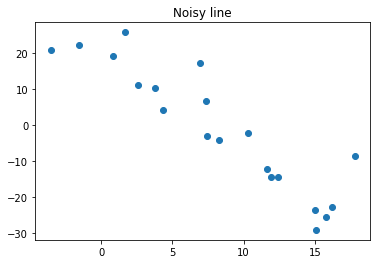

calculated m =  -2.524309790507575
calculated b =  19.590653835091086


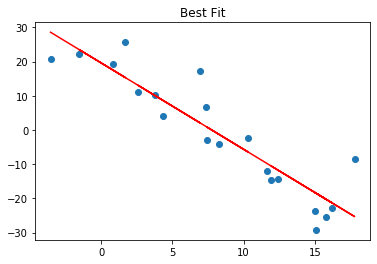

r_squared =  0.8292194911530163


In [2]:
# create data
x = []
y = []

# TODO: vary the range of numbers used to see how the results change -- write your observations in the cell below
#     hint: try single digit, double digit, triple digit and compare
#     hint: change slope and intercept values to see change in results and r_squared
# START
x = [i for i in range(20)]
b = np.random.randint(50)
m = np.random.randint(-10,0)
y = [b + m*xi for xi in x]
# END

# original equation
print("Original equation: we're working backward from a dataset of x and y to find m and b")
print("y = m*x + b where m =", m, "and b =", b)

# add noise
x += np.random.randn(len(x))*3
y += np.random.randn(len(y))*3

# turn into numpy arrays
x = np.array(x)
y = np.array(y)

#  plot raw data
plt.scatter(x,y)
plt.title("Noisy line")
plt.show()

# TODO: write the calculations for the slope and intercept using information from above
#     hint: use numpy dot, sum, and mean
def calculateSlope(x, y):
    # START
    return (x.dot(y) - y.mean()*x.sum()) / (x.dot(x) - x.mean()*x.sum())
    # END

def calculateIntercept(x, y, m):
    # START
    return y.mean() - m*x.mean()
    # END
    
m = calculateSlope(x, y)
b = calculateIntercept(x, y, m)

print('calculated m = ', m)
print('calculated b = ', b)

# best fit y = mx + b line
yhat = m*x + b

plt.scatter(x, y)
plt.plot(x, yhat, 'r')
plt.title("Best Fit")
plt.show()

#  R^2 value (you can ignore the code, just understand what the r_squared indicates in the plot)
def calculateRSquared(y, yhat):
    res = (y - yhat).dot(y - yhat)
    tot = (y - y.mean()).dot(y - y.mean())
    return res, tot
SSres, SStot = calculateRSquared(y, yhat)
r_squared = 1 - SSres/SStot

print('r_squared = ', r_squared)

### TODO
Observations on varying number of data points used: 

*Using less data points makes the fit extremely inaccurate -- you may think of this as an underfitting. Excessive points creates an obvious model and because of the simplicity of the linear model, overfitting is not an issue.*

Try to determine around what range of datapoints starts reporting an accurate answer. Also describe at what point you consider the linear fit "accurate" (if you understand r_squared, then answer with this):

*If you compare the original m and b to the calculated m and b, you can see the range of around 50 allows an accurate response. Using r_squared to explain, the higher the r_squared value means the closer to a full linear fit. Thus, you want the r_squared to be as close to 1.0 as possible, here an allowable range is above 0.92.*

In later sections, we describe a term called "bias" which is derived from the error in approximating real problem. For example here, the bias defines the difference between the true values of slope/intercept and the calculated values we found. We discuss and use this in future sections of featurization and classification. 

## 1D dataset:

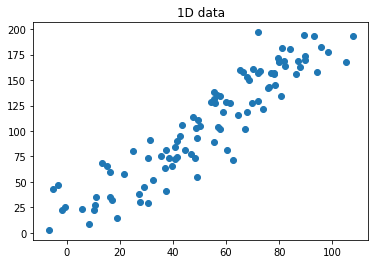

calculated m =  1.7500396829860037
calculated b =  14.36067581298019


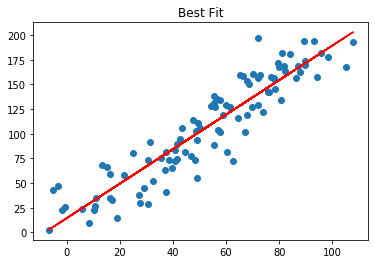

r_squared =  0.8553799096184702


In [3]:
# create data
x = []
y = []

# TODO: open the csv file "data_1d.csv" and read in x,y data
# START
for line in open('data/data_1d.csv'):
    xi,yi = line.split(',')
    x.append(float(xi))
    y.append(float(yi))
# END

# add noise
x += np.random.randn(len(x))*10
y += np.random.randn(len(y))*10
    
# turn into numpy arrays
x = np.array(x)
y = np.array(y)

#  plot raw data
plt.scatter(x,y)
plt.title('1D data')
plt.show()

# TODO: calculate slope and intercept for new dataset
# START
m = calculateSlope(x, y)
b = calculateIntercept(x, y, m)
# END

print('calculated m = ', m)
print('calculated b = ', b)

# best fit y = mx + b line
yhat = m*x + b

plt.scatter(x, y)
plt.plot(x, yhat, 'r')
plt.title("Best Fit")
plt.show()

#  R^2 value
SSres, SStot = calculateRSquared(y, yhat)
r_squared = 1 - SSres/SStot

print('r_squared = ', r_squared)

## Understanding R_Squared and Correlation: 

In the past couple questions, you answered what you thought r_squared means. Here, we'll explain a little further. First though, we'll look at some more general datasets to see when linear regression models make sense vs. not. 

In data science, the value $r^2$ represents the squared value of the correlation coefficient which visually shows correlation between x and y data. This r value is known as Pearson's product moment correlation coefficient. This coefficient is based on standard units with values ranging from -1 to 1 where $r = 1$ would have a scatter perfectly straight line sloped up and $r = -1$ scattered perfectly sloping down. In between, $r = 0$ shows no linear association, i.e. uncorrelated x and y data.

Thus $r^2$ is proportional to how far a predicted point deviates from its true value in y and can be modeled by the linear regression of x and y. For example, the answers to which models are most conducive to linear regression have a higher r coefficient vs. not conducive have lower r coefficient. 

TODO: After reading the above explanation, discuss in your own terms what you have learned and what you think this coefficient measures: 

*Simple solution: it measures the correlation between two variables and if they fit a linear model*

[[ 1.         -0.07838024]
 [-0.07838024  1.        ]]


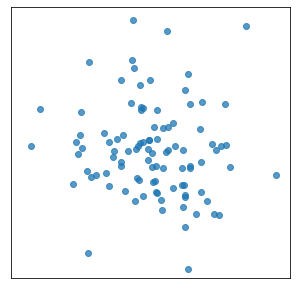

In [4]:
# Just noise
np.random.seed(50)
plt.figure(figsize = (5, 5))
plt.xticks([])
plt.yticks([])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
x1, y1 = np.random.randn(2, 100)
plt.scatter(x1, y1, alpha = 0.75);
print(np.corrcoef(x1, y1))

[[1.         0.91436231]
 [0.91436231 1.        ]]


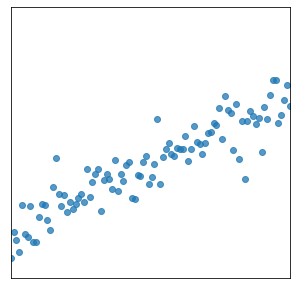

In [5]:
# Strong linear
np.random.seed(50)
plt.figure(figsize = (5, 5))
plt.xticks([])
plt.yticks([])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
x2 = np.linspace(-3, 3, 100)
y2 = x2*0.5 - 0.5 + np.random.randn(100)*0.35
plt.scatter(x2, y2, alpha = 0.75);
print(np.corrcoef(x2, y2))

[[1.         0.03797321]
 [0.03797321 1.        ]]


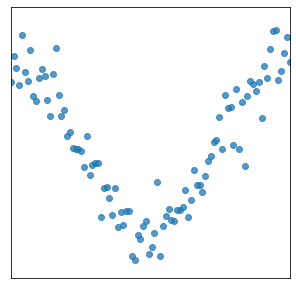

In [6]:
# Strong non-linear
np.random.seed(50)
plt.figure(figsize = (5, 5))
plt.xticks([])
plt.yticks([])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
x3 = np.linspace(-3, 3, 100)
y3 = 2*np.sin(x3 - 1.5) + np.random.randn(100)*0.4
plt.scatter(x3, y3, alpha = 0.75);
print(np.corrcoef(x3, y3))

[[1.        0.4004216]
 [0.4004216 1.       ]]


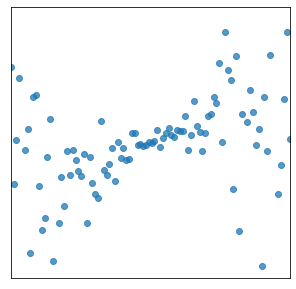

In [7]:
# Unequal spread
np.random.seed(50)
plt.figure(figsize = (5, 5))
plt.xticks([])
plt.yticks([])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
x4 = np.linspace(-3, 3, 100)
y4 = x4/3 + np.random.randn(100)*(x4)/1.75
plt.scatter(x4, y4, alpha = 0.75);
print(np.corrcoef(x4, y4))

### TODO
Please comment below which models are most conducive to a linear regression model and why:

*Sets 2 and 4 are conducive to linear regression because they follow a largely linear path despite any outliers*

For those not conducive to linear regression, please explain what might fit better (just brainstorm methods). If there is no solution, mention that and why: 

*Set 1 does not seem to follow any pattern, as if it's random noise. So no solution works for set 1. Set 3 is very non-linear, looks like an absolute function so maybe using two variables instead of one like in linear regression may work. We wouldn't expect you to know the algorithm here, but we do expect you to mention polynomial functions (e.g. quadratic fit).*

## Sklearn Linear Regression Model

Next we repeat with the sklearn linear regression model to understand how to use ready-made libraries. 

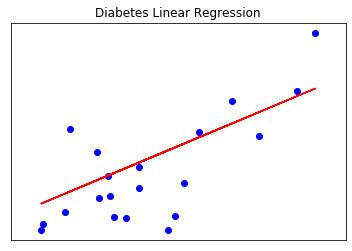

R_squared: 0.47


In [8]:
# TODO: Load the diabetes dataset
#     hint: look at sklearn datasets docs
# START
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# END

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# TODO: Create linear regression object
#       Train the model using diabetes_X_train,diabetes_y_train
#       Make predictions using diabetes_X_test
#     hint: look into sklearn linear regression docs
# START
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
# END

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='blue')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red')
plt.title('Diabetes Linear Regression')

plt.xticks(())
plt.yticks(())

plt.show()

# R^2 value: 1 is perfect prediction
print('R_squared: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

## Sklearn Exponential Curve Fit

Finally, we fit an exponential curve by transforming the data to a linear regression model by writing as: $\log(y)= m\log(x) + b$

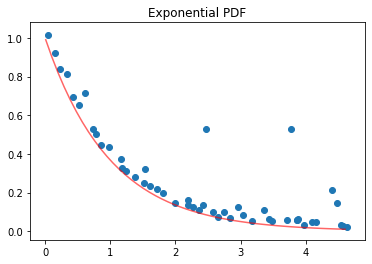

calculated m =  -0.6564588674671944
calculated b =  -0.24235700529187687


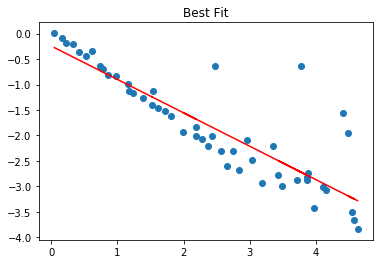

r_squared =  0.7489106678779871


In [9]:
# create exponential curve
fig, ax = plt.subplots(1, 1)

x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 50)
y = expon.pdf(x)
ax.plot(x, y, 'r-', alpha=0.6, label='expon pdf')
plt.title("Exponential PDF")

# add noise
x += np.exp(np.random.randn(len(x)))/20
y += np.exp(np.random.randn(len(y)))/30

plt.scatter(x,y)
plt.show()

# TODO: Change data to allow linear regression fit for exponential function
# START
y = [np.log(yi) for yi in y]
# END

# turn into numpy arrays
x = np.array(x)
y = np.array(y)

# TODO: calculate slope and intercept for new dataset
# START
m = calculateSlope(x, y)
b = calculateIntercept(x, y, m)
# END

print('calculated m = ', m)
print('calculated b = ', b)

# best fit y = mx + b line
yhat = m*x + b

plt.scatter(x, y)
plt.plot(x, yhat, 'r')
plt.title('Best Fit')
plt.show()

#  R^2 value
SSres, SStot = calculateRSquared(y, yhat)
r_squared = 1 - SSres/SStot

print('r_squared = ', r_squared)

Your r_squared should come out to around 0.8-0.9. This section was to just show that transformations to the data can lead to better fits via linear regression. 

We'll discuss more about what this transformation means in our later section in featurization.

# Linear Regression OLS and 3D plot



##Ordinary Least Squares Regression without SKLearn

We can start using the normal equations:

$$
 \hat{\theta} = \left( \mathbb{X}^T \mathbb{X} \right)^{-1} \mathbb{X}^T \mathbb{Y}
$$

We can compute $\hat{\theta}$ by direction using matrix inversion:

### Ordinary least squares (OLS)

$$y = X^Tw$$


If $L$ : $\mathbb{R}^d → \mathbb{R}$ is continuously differentiable, then
any local optimum satisfies $∇L(w^∗) = 0$. In the OLS case,

$$ L(w^*) = ||Xw - y||_2^2$$

$$ = (Xw − y)^T(Xw − y)$$

$$ = (Xw)^TXw − (Xw)^Ty − y^TXw + y^Ty$$

$$ = w^TX^TXw − 2w^TX^Ty + y^Ty$$

Using the following results from matrix calculus:

$$∇_x(a^Tx) = a$$

$$∇_x(x^TAx) = (A + A^T)x$$

The gradient of L is easily seen to be

$$∇L(w) = ∇_w(w^TX^TXw − 2w^TX^Ty + y^Ty)$$

$$ = ∇w(w^TX^TXw) − 2∇w(w^TX^Ty) + ∇w(y^Ty)$$

$$ = 2X^TXw − 2X^Ty$$

where in the last line we have used the symmetry of $X^TX$ to simplify $X^TX+(X^TX)^T = 2X^TX$. Setting the gradient to 0, we conclude that any optimum $w^∗$ OLS satisfies:

$$X^TXw_{ols}^* = X^Ty$$

If X is full rank, then $X^TX$ is as well (assuming n ≥ d), so we can solve for a unique solution:

$$w_{ols}^* = (X^TX)^{−1}X^Ty$$



In [ ]:
from numpy.linalg import inv, solve

## TODO ##
Write the `least_squares_by_inv`  function  to solve the linear systems: $$w_{ols}^* = (X^TX)^{−1}X^Ty$$

In [ ]:
def least_squares_by_inv(X, Y):
  # START
    return inv(X.T @ X) @ X.T @ Y
  # END

A more efficient way to solve the normal equations is using the `least_squares_by_solve` function to solve the linear systems:

$$
A \theta = b
$$

where $A=\mathbb{X}^T \mathbb{X}$ and $b=\mathbb{X}^T \mathbb{Y}$:

In [ ]:
# START
def least_squares_by_solve(X, Y):
    return solve(X.T @ X, X.T @ Y)

# or
def least_squares_by_solve(X, Y):
    A = X.T @ X
    b = X.T @ Y
    return solve(A, b)
# END

## House Price Prediction

The real estate markets, like those in Sydney and Melbourne, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues.

(Data from Kaggle: https://www.kaggle.com/shree1992/housedata)

In [ ]:
data = pd.read_csv('data/data.csv')
data

### Price
We begin by examining a raincloud plot (a combination of a KDE, a histogram, a strip plot, and a box plot) of our target variable `Price`. At the same time, we also take a look at some descriptive statistics of this variable.

In [ ]:
fig, axs = plt.subplots(nrows=2)
sns.distplot(
    data['price'], 
    ax=axs[0]
)
sns.stripplot(
    data['price'], 
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3
)
sns.boxplot(
    data['price'],
    width=0.3, 
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(data['price']) * 0.05
xmin = np.min(data['price']) - spacer
xmax = np.max(data['price']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].artists[0].set_facecolor('white')


####TODO 
Let take a look at some descriptive statistics of this variable. (Hint: Use the `describe`.)

In [ ]:
#START
data['price'].describe()
#END

####TODO
What do you find from the plot and descriptive statistics of this variable?

Answer: *We could find that there are only few points are above 1le7, since we could find from the description that the 75% of the data is at the 6.549625e+05.*


####TODO
Let try to see the plot below 75% of the points (75% is 6.575000e+05). You could use the code we provided above!

In [ ]:
#START
data1 = data[data['price']<=6.575000e+05]
fig, axs = plt.subplots(nrows=2)
sns.distplot(
    data1['price'], 
    ax=axs[0]
)
sns.stripplot(
    data1['price'], 
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3
)
sns.boxplot(
    data1['price'],
    width=0.3, 
    ax=axs[1],
    showfliers=False,
)

#END
# Align axes
spacer = np.max(data1['price']) * 0.05
xmin = np.min(data1['price']) - spacer
xmax = np.max(data1['price']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].artists[0].set_facecolor('white')

###Price vs Bedrooms and Bathrooms
Nex we want to see how the number of bedrooms and bathrooms would affect the house price. 



####TODO
Let make an DataFrame only include price, bedrooms and bathrooms. Let set the x1 be the number of bedrooms, x2 be the number of bathrooms and y be the number of price. Since the price is high let divide the price by 1,000,000.

Here also we only care about the price below 6.575000e+05!

In [ ]:
#START
data = data[data['price']<=6.575000e+05]
x1 = data['bedrooms']
x2 = data['bathrooms']
y = data['price']/1000000
sample_data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
sample_data = sample_data[sample_data['y'] != 0]
sample_data
#END

### Testing on Sample Data



####TODO
Let's quickly test two linear regressions on our sample dataset:
$$w_{ols}^* = (X^TX)^{−1}X^Ty$$ and 
$$
A \theta = b
$$

In [ ]:
# Let make the x be number of x1 and x2, and y be all the number of y
# START
x = sample_data[["x1", "x2"]].to_numpy()
y = sample_data[["y"]].to_numpy()
# END

First let use $$w_{ols}^* = (X^TX)^{−1}X^Ty$$ to calculate our data


In [ ]:
# START
w_hat = least_squares_by_inv(x,y)
w_hat
# END

Then let use $$
A \theta = b
$$ to calculate our data.

In [ ]:
# START
theta_hat = least_squares_by_solve(x,y)
theta_hat
# END

They both agree! 

####TODO
Next, we visualize the association between Price, Bedrooms, and Bathrooms.

(hint: Use `go.Scatter3d` https://plotly.github.io/plotly.py-docs/generated/plotly.graph_objects.Scatter3d.html)



In [ ]:
#Let make 3D plot of all the data points.
# START
fig = go.Figure()

data_scatter = go.Scatter3d(x=sample_data["x1"], y=sample_data["x2"], z=sample_data["y"], 
                            mode="markers",
                            marker=dict(size=2))
fig.add_trace(data_scatter)
fig.update_layout(margin=dict(l=0, r=0, t=0, b=0), 
                  height=600)
fig
# END

## Using SKLearn

Scikit Learn, or as the cool kids call it sklearn (pronounced s-k-learn), is an large package of useful machine learning algorithms. We will use the `LinearRegression` model in the [`linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) module.  The fact that there is an entire module with many different models within the `linear_model` module might suggest that we have a lot to cover still (we do!).  

**What you should know about `sklearn` models:**

1. Models are created by first building an instance of the model:
```python
model = ModelType(args)
```
1. You then fit the model by calling the **fit** function passing in data:
```python
model.fit(df[['x1' 'x2']], df[['y']])
```
1. You then can make predictions by calling **predict**:
```python
model.predict(df2[['x1' 'x2']])
```

The neat part about sklearn is most models behave like this.  So if you want to try a cool new model you just change the class of mode you are using. 


We import the `LinearRegression` model

In [ ]:
from sklearn.linear_model import LinearRegression

####TODO
Create an instance of the model:

In [ ]:
# START
model = LinearRegression(fit_intercept=True)
# END

####TODO
Fit the model by passing it the $X$ and $Y$ data:

In [ ]:
# START
model.fit(sample_data[["x1", "x2"]], sample_data[["y"]])
# END

####TODO
Make some predictions and even save them back to the original DataFrame

In [ ]:
# START
sample_data['y_hat'] = model.predict(sample_data[["x1", "x2"]])
sample_data
# END

This function could make a plane on the 3D plot!

In [ ]:
def plot_plane(f, X, grid_points = 30):
    u = np.linspace(X[:,0].min(),X[:,0].max(), grid_points)
    v = np.linspace(X[:,1].min(),X[:,1].max(), grid_points)
    xu, xv = np.meshgrid(u,v)
    X = np.vstack((xu.flatten(),xv.flatten())).transpose()
    z = f(X)
    return go.Surface(x=xu, y=xv, z=z.reshape(xu.shape),opacity=0.8)

####TODO
Plot the data and plane (hint: use the funtion we provided above):

In [ ]:
# START
fig = go.Figure()
fig.add_trace(data_scatter)
fig.add_trace(plot_plane(model.predict, x))
fig.update_layout(margin=dict(l=0, r=0, t=0, b=0), 
                  height=600)
fig.show()
# END

####TODO
What do you find from this graph?

Answer: *We could find that the linear model is not fit on this graph well. Most points are above or below the plane. [We will later study other more models, such as ridge regression, Lasso regression, etc, which will fit better on this model.]*

# One Hot Encoding

## What is categorical data?

**Categorical data** are variables that are classified by labels rather than strictly numerical values. Often these variables are called _nominal_ variables. For example, a "pet" variable can have values like "dog", "cat", or "iguana". 

As you may know, data sets aren't always in numerical form. Similar to categorizing your classes by subject, or the clothes you wear by occasion, humans have a natural tendancy to associate data with nominal variables. 

Other forms of data include numerical, as we have seen before, and ordinal data, which are categorical data which have rankings or order. Ex: star ratings on yelp.

### So how do computers see and use categorical data?

Some algorithms can work with categorical data directly, for example, decision trees (which you will learn about later in ML) Our job now as avid machine learning enthusiasts is to translate categorical data into a way the majority of machine learning algorithms can efficiently provide modelling and analysis, which brings us to our module topic: One Hot Encoding.

## One Hot Encoding

One Hot encoding expands the columns of a categorical dataset to include the categories as columns in a numerical way.

The term "One Hot" comes from how categories are indicated in this form, with the row record's are lit up as a '1' if it falls into the category of question, and 0 otherwise.

![Tabular image of One Hot Encoding](images/one_hot_state.png)

While this is a small example, one hot encoding can span several categories and simple but robust enough to be used commonly in various fields of machine learning and data science. For example, Natural Language Processing sometimes will take tweets (each row would be one recorded tweet), and vectorize words similar to how we one-hot encode catagories!

Fun Fact: The term one-hot encoding comes from a digital circuit encoding of a categorical state as particular "hot" wire.

![Wire Image of One Hot Encoding](images/one_hot_encoding.png)

### The Process

One hot encoding is a way to reframe your existing data. 

5 Steps to manually produce One hot encoding:
1. Clean the dataset and create a column for the category. This table with the original catagory column will be called 'Table A'.
2. Find the set of unique labels in a category from Table A.
3. For each unique label, create columns in a new dataframe, Table B. (If there are multiple catagorical columns to encode, common practice is to rename these new columns in the form 'category_value - ex: 'species_human', 'species_dog') Fill these columns with the default value, 0.
4. For each non-categorical column (the numerical columns where one-hot encoding is not needed), append it to this to the new dataframe, Table B.
5. Loop through each record (row value) of the Table A. For each category, you want to change the encoded value in Table B to '1'. 



## Let's put what we learned into action!

## Part A: Simple Encoding Exercise



### Part 1: Manual Encoding
One weekend the staff of EE16ML decide to open a fruit stand to help raise funds to support Oski's career as a computer scientist. The staff is given a catalogue of fruits they are able to source for their new pop up fruit shop.

The fruit column represents the label that the fruit has - 'apple', for example. The price column is a float representing the $USD of a pound of the corresponding fruit. The season is the best season for the fruit to grow between summer and winter. The rating column represents the popularity of the fruit among Berkeley students out of 5.

The EE16ML staff want to reframe the existing data so that they can run some code on it. As a go-getter student assistant, you volunteer to preprocess the table and one-hot encode the catagorical variables.

In [ ]:
## A Simple Example
# run this cell to create the dataset
fruit_info = pd.DataFrame(
    data={'fruit': ['apple', 'orange', 'banana', 'raspberry'],
          'price': [5, 6, 2, 3],
          'season': ['winter', 'winter', 'summer', 'summer'],
          'rating': [4, 2, 3, 5]
          })
# display fruit_info
fruit_info

## data example source: data 100 lab 2 https://data100.datahub.berkeley.edu/user/jiyoojeong/notebooks/sp20/lab/lab02/lab02.ipynb


####TODO
Now we want to manually one hot encode this table using the process we just learned.

_Hint: It might help to look at the sanity check questions!_



In [ ]:
## START
# you may not use any libraries outside of pandas for this section.
fruit_one_hot = pd.DataFrame()

# TODO: Your code here.
# Hint: think about what you would like to do at each step, and how many times
# the process will be repeated.
# Hint 2: A simple pandas function to add new empty columns is df.reindex!

# alternative, but working solutions, will be accepted.
categorical_columns = ['fruit', 'season']
numerical_columns = ['price', 'rating']

new_columns = []
for cat in categorical_columns:
  new_names = []
  category_values = fruit_info[cat].values
  for val in category_values:
    if cat + '_' + val not in new_names:
      new_names.append(cat + '_' + val)
  new_columns.extend(new_names)

# copy numerical columns
fruit_one_hot['price'] = fruit_info['price']
fruit_one_hot['rating'] = fruit_info['rating']

# initialize empty new columns
fruit_one_hot = fruit_one_hot.reindex(columns = fruit_one_hot.columns.tolist() \
                                      + new_columns, fill_value='0')

# categorize and encode
for i in fruit_info.index.values:
  fruit_name = fruit_info['fruit'][i]
  season = fruit_info['season'][i]
  one_hot_vector = [1 if fruit_name in c or season in c else 0 for c in new_columns]
  fruit_one_hot.loc[i, new_columns] = one_hot_vector

# END.

# display table
fruit_one_hot

Sanity Check: 
- How many columns should your new table have? How many are columns from the catagorical variables? _your answer here_ It should have 8 columns. 6 for the new categorical columns.
- What should the columns be? _your answer here_ 'price', 'rating', 'fruit_apple', 'fruit_orange', 'fruit_banana', 'fruit_raspberry', 'season_winter', 'season_summer'
- Does your newly encoded table still have the same data points? Briefly justify why. _your answer here_ Yes, we are expanding the columns that each datapoint refers to, not creating new datapoints. Thus, no new rows are added.

#### Decoding the one-hot encode

To help solidify your understanding of one-hot encoding, think about how the script to undo a one-hot encoding process would work. Describe in detail what this process would look like in pseudocode.

_Your pseudo code here_

1. Get the non numeric column values of the dataset.
2. Separate each categorical variable based on prefixes. If no prefix, then assume only one variable.
3. Create a new table with the numerical columns and catagorical variables.
3. For each variable, loop through each row index to obtain the one hot encoded label for each catagorical variable.
4. For each '1' value, append to a new list of the labels the 1 corresponds to.
6. Set the categorical variable cell for this row as this new list of labels.


### Part 2: Pandas One Hot Encoding

The previous manual method is actually pretty inefficient for large data, as we need to loop in through the data multiple times and determine new columns. Using pandas to hold your data in dataframes however allows us to actually utilise one of their library functions to one hot encode catagories efficiently and effectively!

You can use Pandas.get_dummies to get the one hot encoded version of the dataframe.

Try running the cell below:



In [ ]:
# returns the one hot encoded table of only column 'fruit'
pd.get_dummies(fruit_info['fruit'])

In [ ]:
# returns the full dataframe with one hot encoded columns
pd.get_dummies(fruit_info)

### Part 3: Using SKLearn's OneHotEncoder

For larger or more complex datasets, SKLearn provides a One Hot Encoder through it's preprocessing kit. Find the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).


[Data 100's textbook chapter on one hot encoding](https://www.textbook.ds100.org/ch/14/feature_one_hot.html) also has a great example of using the DictVectorizer from the feature_extraction library instead of OneHotEncoder for similar results if you want an additional perspective of one hot encoding using SKLearn. 


* Note: Using the OneHotEncoder will encode the entire dataframe you input as one-hot categories, even numerical columns. 

In [ ]:
## SKLearn's OneHotEncoder

# load library
from sklearn.preprocessing import OneHotEncoder


First we observe the simple example of encoding a matrix with binary one-hot encoding. The following sample data has two catagories, one for an individual's gender and another for a the order of arrival at a restaurant.

#### From the Docs
> "Encode categorical features as a one-hot numeric array. The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter. By default, the encoder derives the categories based on the unique values in each feature. Alternatively, you can also specify the categories manually. This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels."


Review the documentation for the SKLearn OneHotEncoder.


####TODO
For the following cells where prompted, run and understand what is happening, and utilise the library functions to obtain desired results.

In [ ]:
# A simple example : courtesy of scikit-learn.org

# create and fit the encoder to the dataframe
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(fruit_info)

In [ ]:
# TODO: Display the created catagories:
# START
enc.categories_ # ans
# END

In [ ]:
# get vectorized one-hots from inputs
enc.transform([['apple', 2, 'winter', 4], ['raspberry', '5', 'spring', '2']]).toarray()
# notice how since spring was not trained on, it does not get encoded

In [ ]:
# TODO: return a catagory from a the binary vectors given.
# START
m = [[1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]
enc.inverse_transform(m) 
# END
# Hint: you should be getting the same inputs as the previous cell!

In [ ]:
# returns the feature names
enc.get_feature_names(['fruit', 'price', 'season', 'rating'])




> What step of the manual featurization does this resemble? _your answer here_

## So what do you do if you have labels in your y values?

Instead of using the OneHotEncoder, SKLearn has an additional encoder called the [Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) as well as the [Label Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html#sklearn.preprocessing.LabelBinarizer). This is used when the labels are catagorical in nature, similar to the ideology of the OneHotEncode.

However, since labels may be numerous beyond 2, but the array needs to remain a 1-d array, encoding labels with the Label Encoder in increasing numerical order helps create a numerical representation of the data to feed into advanced machine learning algorithms. The Label Binarizer on the otherhand, uses a one-vs-all system, where one label is encoded as '1', while the rest are encoded as '0'.

Look forward to later this week where we will be working with binary classification !

## Part B: Working with more sophisticated data + Linear Regression!

You spend the weekend bingeing movies on netflix, and are curious about what factors can make a movie really successful. You gather a dataset of three decades of released films to explore your question: Can we predict the gross of a movie from other factors of production?

Explore the provided [movie industry dataset](https://www.kaggle.com/danielgrijalvas/movies) and answer the questions below. 


In [ ]:
## A bit more complex example
# load google playstore user app data
movies = pd.read_csv('data/movies_dat.csv')
# courtesy of Lavanya Gupta // source: https://www.kaggle.com/lava18/google-play-store-apps
cols = movies.columns
# code for cleaning the dataset and removing NaN's and other errors in the data has been provided below
# run cell to clean data and retrieve relevant columns. Original table can still be accessed using google_apps
print(cols)

# display top 5 rows of data
movies.head(5)


### TODO: Framing Questions
1. For each of the following columns, state whether or not it is a numerical, ordinal, or categorical variable.

'budget' = numeric , 'company' - categorical , 'country' - categorical, 'director' - categorical , 'genre' - categorical, 'gross' - numerical, 'name' - catagorical , 'rating' - numerical, 'released' - ordinal, 'runtime' - numerical, 'score' - numerical , 'star' - catagorical, 'votes' - numerical, 'writer' - categorical, 'year' - ordinal


2. Which columns seem relevant to exploring your question? (Select at least 3 to describe).

Any of the above with justification will suffice, but catagorical variables like company, director, star, and writer will be more difficult to encode due to the sheer size of possibilities.



3. Which of the selected columns will you have to clean? Do some data types or phrasing have to be cleaned or changed to fit your needs better?

We need to make sure that the numeric categories have an int or float type conversion from strings.

### Preprocessing and One Hot Encode

In [ ]:
# select columns of interest
columns = ['budget', 'company', 'country', 'director', 'genre', 'score', 'name','rating', 'released', 'runtime', 'star', 'votes', 'writer','year']

predict_this_column = ['gross']

In [ ]:
# For each column that is a catagorical variable, see how many possible values there can be.
# If this is a large number, it can hinder performance and may not be as useful as you might have thought.
for i, c in enumerate(columns):
  ## Uncomment to view to histograms. This will take a while to run
  #plt.subplot(4,4,i+1)
  #plt.hist(movies[c], bins = 15)
  #plt.title(c)
  print("---- column: ", c , "----")
  #print(movies[c].value_counts().head())
  valcounts = movies[c].value_counts()
  print('total #: ', len(valcounts))
  print('most common value, freq: ', valcounts.index[0],',', valcounts[valcounts.index[0]])

Some columns are left in string format rather than int/double type, which is what we need to use for numerical data.



In [ ]:
# TODO: START
# Hint: pandas provides a datetime type conversion using .to_datetime()
# Hint: pandas also has a .astype() to change types of series.
movies_clean = movies.copy()
movies_clean['budget'] = movies['budget'].astype('float')
movies_clean['score'] = movies['score'].astype('float')
movies_clean['gross'] = movies['gross'].astype('float')
movies_clean['released'] = pd.to_datetime(movies['released'])
movies_clean['runtime'] = movies['runtime'].astype('int')
movies_clean['votes'] = movies['votes'].astype('int')
# END

In [ ]:
# Optional: plot interesting relationships here while exploring.
#movies_clean.plot('score', 'gross', 'scatter')
#movies_clean.plot('year', 'gross', 'scatter')
#movies_clean.plot('budget', 'gross', 'scatter')
#movies_clean.plot('runtime', 'gross', 'scatter')
#movies_clean.plot('genre', 'gross', 'scatter')

Next, we must one-hot encode the categorical variables.

One hot encode the columns for the movies dataset and save it as movies_enc. It is best not to use the 'director', 'star', 'release date' and 'name' columns for efficiency.

Try to find the most efficient solution!

In [ ]:
gross = movies_clean['gross']
# TODO: 
# Hint: Use the pandas.get_dummies function!
# alternative, but working solutions, will be accepted.
# START
columns = ['budget','company', 'director','country', 'genre', 'score','rating', 'runtime', 'votes','year']
columns_select = ['genre', 'score', 'budget', 'votes']
movies_enc = pd.get_dummies(movies_clean[columns_select])
# END
movies_enc.head(5)

With this preprocessed data, we can now perform linear regression find the line of best fit!

In [ ]:
# Perform linear regression on movies_enc

# import neccessary packages
from sklearn.linear_model import LinearRegression

# split the data
shuffled_idx = np.random.permutation(movies_enc.index.values)
ntrain = (int)(.8 * len(shuffled_idx)) # 80 % of data for training)

x_train = movies_enc.loc[shuffled_idx[0:ntrain],:]
x_test = movies_enc.loc[shuffled_idx[ntrain:],:]
y_train = gross.loc[shuffled_idx[0:ntrain]]
y_test = gross.loc[shuffled_idx[ntrain:]]

# TODO: 
# classify and predict


clf = LinearRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

# compute prediction error using SKLearn
score = clf.score(x_test, y_test)
rmse = np.sqrt(np.average((y_pred - y_test)**2))
# end your code.
coef = clf.coef_
intercept = clf.intercept_
print('Model Score on 80/20 train/test split: ', score)
print('RMSE: ', mse)

Visually, we can also observe the difference in predictions and real ratings.

In [ ]:
# scatter
plt.scatter(y_pred, y_test, s=.1)

# mx + b regressed line
x = np.linspace(0, 4e8, 1000)
plt.plot(x, score * x, c='r') # R^2 Line
plt.title('Predictions vs. Real for $gross')
plt.xlabel('Predictions')
plt.ylabel('Real')

### Free Response Question:

How can we improve this model? Is Linear Regressiont the best model for this dataset?
Respond in 3-4 sentences.

_your answer here_

Our model had to use a select number of features, which still did not improve drastically the classification. We can see that most movies have low gross, while some movies do have very high gross seasons. This non linear relationship may be the cause of our linear regression classifier not performing very well. Using a model more robust to outliers or non linear may improve performance. 

## You reached the end of this part of the homework!

Next, we will be learning about expanding your dataset to model non-linear polynomials with featurization.

# Featurization

## Fitting an Ellipse ##

Lines are cool, but what if we wanted to fit something more complicated. For example, did you know that we could predict the orbit of certain planets with least squares?

In fact, Carl Friedrich Gauss, a great mathematician and physicist, used least squares to predict where certain planets would be in their orbit. Using Kepler's laws of planetary motion, Gauss knew that the shape of the orbit of planets followed the equation:

$$ax^{2}+bxy+cy^{2}+dx+ey=f$$

where x and y were the coordinate points of the planet in orbit. Since there is one free variable in this equation, so Gauss divided the whole equation by f to get:

$$ax^{2}+bxy+cy^{2}+dx+ey=1$$

Now, how in the world was Gauss able to fit this equation with least squares? Let's first try to use our standard approach to least squares to solve this problem, and we'll see how that falls short. We'll generate data from an ellipse and try to reverse engineer the equation that generated it.

In [ ]:
def ellipse_angles(n, a, b):
    if (n <= 0 or b <= a):
        print("ERROR")
        return

    angles = 2 * np.pi * np.arange(n) / n
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / n
        arcs = np.arange(n) * arc_size
        res = sp.optimize.root(lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

a = 16
b = 25
n = 30

phi = ellipse_angles(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

x = b * np.sin(phi)
y = a * np.cos(phi)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(x, y)
plt.show()

We have our x and y coordinates of the ellipse stored in the array x and the array y. Let's try using standard least squares to fit this ellipse. In other words, let us assume that there exists a matrix A such that
$$cx=y$$
where x is our array x and y is your array y. We are trying the coefficient c that best approximates this so let us do least squares. We will do this by using the closed form solution as well as directly using sklearn.

In [ ]:
x_train = np.array(x)
y_train = np.array(y)

### TODO
### Your code here. Compute the least squares estimate of c using numpy.
c = 1/(np.dot(x, x))*np.dot(x_train,y_train)
### Your code stops here.

### TODO
### Your code here. Compute the least squares estimate of c_sklearn using sklearn.
c_sklearn = LinearRegression(fit_intercept=False).fit(x_train.reshape(-1, 1), y_train).coef_[0]
### Your code stops here.

print("Your least squares estimate for c is " + str(c))
print("Your least squares estimate for c_sklearn is " + str(c_sklearn))

Let's see how good your estimate is!

In [ ]:
y_predict = c*x

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(x, y_predict)
plt.axis([-30, 30, -5, 5])
plt.show()

Wow. That's a pretty bad recreation of the actual ellipse. And this should be expected. After all, least squares as we learned it can only predict straight lines. So how did Gauss fit curves with least squares? This is where featurization comes in. If the underlying relationship from our data is nonlinear, it turns out we can still deal with this through linear least-squares by augmenting the data with new features. In a sense, we will lift the dimension of each data point into a different form. In this case, since we know that the underlying structure of the model abides by the equation,

$$ax^{2}+bxy+cy^{2}+dx+ey=1$$

, we can now treat x and y both as datapoints and lift these datapoints to a higher dimensional space as such:

$$\begin{bmatrix}
x_1^2 & x_1y_1 & y_1^2 & x_1 & y_1\\
... & ... & ... & ... & ...\\
x_n^2 & ... & ... & ... & y_n
\end{bmatrix} 
\begin{bmatrix}
a\\
b\\
c\\
d\\
e
\end{bmatrix} = 
\begin{bmatrix}
1\\
...\\
...\\
...\\
1
\end{bmatrix}$$

In this matrix equation above, we have n datapoints labeled $(x_i, y_i)$ where $i$ exists in $[1, n]$. 

Let's take a step back and think about what we are doing here. We have essentially lifted our 2-dimensional (x, y) datasets into a 5-dimensional vector space $(x^2, xy, y^2, x, y)$. In addition to that, we have given intrinsic structure to the shape of our points in our 5-dimensional vector space. 

For this specific problem, note that the regression problem has slightly changed here in that our data is now (x, y) and our ground truth output is just the number 1. With this in mind, let us do featurized linear regression!

Let's first create a new augmented data matrix of size n x 5 from our x, y data points.

In [ ]:
x_train = np.array(x)
y_train = np.array(y)

### TODO
### Your code here. Create A_augmented.
n = len(x_train)
A_augmented = np.zeros((n, 5))
for i in range(n):
    xi, yi = x_train[i], y_train[i]
    A_augmented[i] = np.array([xi**2, xi*yi, yi**2, xi, yi])

### Your code stops here.
print("The first 5 rows of our new augmented matrix is ")
print(A_augmented[:5])

Nice! Now that we have our augmented matrix, let us do least squares regression with it (via both numpy way and sklearn way).

In [ ]:
n = A_augmented.shape[0]
### TODO
### Your code here. Create the 1s vector.
ones = np.ones((n, 1))
### Your code stops here.

### TODO
### Your code here. Get the least squares estimate p using numpy.
p = np.linalg.inv(A_augmented.T@A_augmented)@A_augmented.T@ones
### Your code stops here.

### TODO
### Your code here. Get the least squares estimate p_sklearn using sklearn.
p_sklearn = LinearRegression(fit_intercept=False).fit(A_augmented, ones).coef_[0]
### Your code stops here.

print("Your least squares estimate for p is \n" + str(p))
print("Your least squares estimate for p_sklearn is \n" + str(p_sklearn))

Now let's see how closely our predictions are to the actual values!

In [ ]:
print("Our predicted output vector is: ")
print(A_augmented@p)

## TODO ##
You should have gotten an output of all ones. What does this mean?

*Wow! It's an exact match. By knowing the underlying structure of the data and featurizing based on it, we were able to get a 100% match compared to the ground truth!*

## TODO ##

Just for practice, we will give you a new datapoint x of value 13. Find a way to use your least squares estimate p to find the corresponding y. You may have to take out pen and paper and use an online equation solver for this now. After finding the values of y (there should be more than 1!), plug it into y_new and y_new2 below.

*They should remember that $ax^{2}+bxy+cy^{2}+dx+ey=1$ and plug in $x=13$ and p into this equation to get* 

$$(1.60000000e-03)(13)(13)+(-4.06575815e-20)(13)y+(3.90625000e-03)y^2+(-3.79470760e-18)(13)+(-8.67361738e-19)y = 1$$

*Using an equation solver to find that* $y=13.66666016260008$ *and* $y=-13.66666016260008$.

In [ ]:
x_new = 13

### TODO
### Your code here. Plug in y_new.
y_new = 13.66666016260008
y_new_2 = -13.66666016260008
### Your code stops here.

Let's plot these two points with the others to visually see how well they fit in!

In [ ]:
def ellipse_angles(n, a, b):
    if (n <= 0 or b <= a):
        print("ERROR")
        return

    angles = 2 * np.pi * np.arange(n) / n
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / n
        arcs = np.arange(n) * arc_size
        res = sp.optimize.root(lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

a = 16
b = 25
n = 30

phi = ellipse_angles(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

x = b * np.sin(phi)
y = a * np.cos(phi)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(x, y)
ax.scatter([x_new, x_new], [y_new, y_new_2])
plt.show()

### Polynomial Featurization ###

## TODO ##
How do your two predicted points fit in with the rest of the points?

*These two datapoints should fit right in! Visually this looks like a perfect match. Well done.*

For polynomial featurization, it turns out sklearn has a nice shortcut for creating it. Let's check it out. Try to understand the code below.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

x_train = np.array([[2, 3]]).reshape(1, -1)

poly_features = PolynomialFeatures(degree=2)
x_augmented = poly_features.fit_transform(x_train)
print("Degree 2 polynomial lifting of x_train: ")
print(x_augmented)

poly_features = PolynomialFeatures(degree=3)
x_augmented = poly_features.fit_transform(x_train)
print("Degree 3 polynomial lifting of x_train: ")
print(x_augmented)

## TODO ##

Explain what the degree parameter in PolynomialFeatures is doing and how the output of fit_transform relates to the input x_train.

*The degree parameter specifies to what degree you want to featurize your data for polynomial regression. With this degree parameter specified, fit_transform lifts your input data into the respective polynomial feature space. So (x, y) lifted in degree 2 would become $(1, x, y, x^2, xy, y^2)$.*

With this nice tool equipped, let us tackle a real dataset. We will be using regression lifting in the polynomial space to predict red wine quality based on certain features such as citric acid levels and volatile acidity levels.

In [ ]:
df = pd.read_csv('data/winequality-red.csv')
# We are trying to predict the quality of wine
y = df[['quality']]
# These are our inputs
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]

# We will train on X_train/y_train and see how well our model is based on X_test/y_test
X_train, y_train = X, y

Feel free to play around with the X_train, y_train datasets below before we do polynomial regression.

In [ ]:
### TODO
### Play around with the data to get a feeling of what it looks like

y_train
#X_train

Now, let's do polynomial regression on X_train and y_train. Play around with the degree range in rg.

In [ ]:
### TODO

errors = []
rg = [t for t in range(1, 6)]
### Your code here. Featurize X_train and y_train using PolynomialFeatures and then do LinearRegression on it.
for degree in rg:
  model = PolynomialFeatures(degree=degree)
  X_train_aug = model.fit_transform(X_train)

  lg = LinearRegression()
  lg.fit(X_train_aug, y_train)

  y_train_prediction = np.round_(lg.predict(X_train_aug))
  err = mean_squared_error(y_train, y_train_prediction)
  errors.append(err)
  print("Training error is for degree "  + str(degree) + " is " + str(err))
### Your code stops here.

plt.plot(rg, errors)
plt.xlabel('degree')
plt.ylabel('training error')
plt.show()

## TODO ##
The training error should monotonically decrease. Why does this happen? Does this necessarily mean that the model is becoming a better and better fit? Why?

*The training error monotonically decreases because with a higher degree, the model has more wiggle room to fit the training data. This does not necessarily mean that the model is becoming a better fit because, by fitting exclusively to the training data very well, the model may be fitting to the noise and variability inherit within the data. This is loosely called overfitting.*

# Linear Regression for Classification #

Let's turn our attention towards another import problem in machine learning - classification. Before you proceed, pleas read the section on classification in the notes.

We are going to use the popular `palmerpenguins` dataset which contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica. Feel free to play around with the data and perform some EDA to get a feel of it.

In [ ]:
df = sns.load_dataset('penguins')
df.head()

## Binary Cassification##

We are going to start off by trying to classify the penguins' sex based on some of their physical dimensions. We have to assign each penguin to one of two classes: male or female. Because we have two categories, we are performing **binary classification**. Later on, we will see how we can extend this method to multiple classes. First, we have to prepare and clean our data. For this task we are going to use only two predictor variables to facilitate visualization, the penguins' *bill length* and *body mass*. 
Create two dataframes, $X$ and $y$, containing the specified columns. Remove any `NaN` values from the dataset.

In [ ]:
#Remove any NaN entries and extract the relevant columns of the dataframe.

#START
df = df.dropna()
X = df.iloc[:,[3,5]]
y = df.iloc[:,6]
#END

To apply linear regression to this classification problems, we will have to encode the classes as numerical data. We will adopt the convention that the female class is represented by a 1 and the male class by a -1. Therefore, we are using the level set of 0 of the regression function as the classification hyperplane (refer to the notes for a more detailed explanation). Transform the data using this classification rule. Additionally, we will need a bias term so add a constant feature to the $X$ data.

In [ ]:
# Create a target vector y with 1 and -1 for female and male, respectively, and add the bias term to X.

#START
y = y.replace({'Female': 1, 'Male': -1})
X.insert(2, 'ones', np.ones(len(X)))
#END

In [ ]:
#Run this cell, no codign required.
def visualize_dataset(X, y, title=""):
    plt.figure(figsize=(10,10))
    plt.scatter(X[y < 0.0].iloc[:,0], X[y < 0.0].iloc[:,1], s=16, label='-1')
    plt.scatter(X[y > 0.0].iloc[:,0], X[y > 0.0].iloc[:,1], s=16  , label='1')
    plt.legend()
    plt.xlabel('Bill Depth, mm')
    plt.ylabel('Body Mass, g')
    
visualize_dataset(X,y)

Now we are ready to perform linear regression.  Implement the least square solution and report the weight vector and the MSE.

In [ ]:
# Implement the OLS solution. You can use NumPy's linalg library.
#START
w = np.linalg.solve(X.T @ X, X.T @ y)
y_pred = X @ w
#END

# The coefficients
print('Coefficients: \n',w)

# The mean squared error
print('Mean squared error: %.2f'
      % np.mean(np.square(y - y_pred)))

Now fit the model again using `sklearn`. Report the learned weights and the MSE. Do they match the results from the previos part?

In [ ]:
#Repeat using sklearn, set fit_intercept to False

#START
lr = LinearRegression(fit_intercept=False)
lr.fit(X, y)
y_pred = lr.predict(X)
w = lr.coef_
#END

# The coefficients
print('Coefficients: \n',w)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))

As stated earlier, we are going to use 0 as our classification threshhold. We are going to classify any positive outputs of our model as 1 (Female) and any negative outputs as -1 (Male). The function in the cell below should take as input data $X$ and weights $w$ and output a vector of predicted classes. Fill in the function and report the percent of samples that were correctly classified, also known as the **accuracy**.

In [ ]:
def classifier_linear(X, w):
    """Classify the samples X using weights w."""
    #START
    return -1.0*(X @ w < 0.0) + 1.0*(X @ w > 0.0)
    #END

y_pred_classes = classifier_linear(X, w)
# Classifier accuracy
print('Accuracy: %.2f'
      % np.mean(y == y_pred_classes))

Now run the following cell to visualize the **decision boundary**. Briefly 

---

comment on its shape and how well it separates the data.

In [ ]:
# Visualize the decision boundary
XX, YY = np.meshgrid(np.linspace(11,23, 500), np.linspace(2500, 6500, 500))
X_vis = np.stack([np.ravel(XX), np.ravel(YY)])
X_vis_aug = np.ones((X_vis.shape[0]+1, X_vis.shape[1]))
X_vis_aug[:-1,:] = X_vis
X_vis_aug = X_vis_aug.T

def visualize_classifier(X, y, w):
    """Visualize the decision boundary for a classifier.

    Input: a vector of classification decisions using X0_aug as the samples
    """
    plt.figure(figsize=(10,10));
    props = {'fontweight': 'bold'}
    ZZ = np.resize(classifier_linear( X_vis_aug, w), (500, 500))
    plt.title("Decision Boundary", **props)
    plt.contourf(XX,YY,ZZ, cmap="coolwarm", levels=1)
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap="coolwarm", s=10)
    plt.xlabel('Bill Depth, mm')
    plt.ylabel('Body Mass, g')
    

visualize_classifier(X, y, w)

### TODO

Answer: *In 2D the decision boundary is a line. The classifier separates the data well.*

## Multiclass  Classification##

Now, let's take a step back and look at what happens when we have multiple classes.

In [ ]:
df.head()

In particular, we are going to try and model the penguins' species based on their *bill length* and and *flipper length*. 

In [ ]:
df['species'].value_counts()

In [ ]:
plt.figure(figsize=(10,10));
gentoo = df[df['species'] == 'Gentoo'][['bill_length_mm','flipper_length_mm']]
adelie = df[df['species'] == 'Adelie'][['bill_length_mm','flipper_length_mm']]
chinstrap = df[df['species'] == 'Chinstrap'][['bill_length_mm','flipper_length_mm']]
plt.scatter(gentoo['bill_length_mm'], gentoo['flipper_length_mm'], label = 'Gentoo', color = 'b')
plt.scatter(adelie['bill_length_mm'], adelie['flipper_length_mm'], label = 'Adelie', color = 'r')
plt.scatter(chinstrap['bill_length_mm'], chinstrap['flipper_length_mm'], label = 'Chinstrap', color = 'g')
plt.xlabel('Bill Length, mm');
plt.ylabel('Flipper Length, mm');
plt.legend();


To predict three different classes, we are going to use a technique called **one-vs-all classification**. Namely, we are going to have three separate models. Each one is going to classify the samples as belonging to one of the three classes or not. Hence, the name "one-vs-all". At the end we are going to classify a sample as the class with the highest value outputed by the three classifiers. We will encode the Adelia, Gentoo and Chinstrap species as classes 0,1 and 2, respectively.

In [ ]:
# Create the X and y dataframes
X_b = df.iloc[:,[2,4]]
X_b.insert(2, 'ones', np.ones(len(X)))
y_b = df.iloc[:,0]
y_orig =y_b.replace({'Adelie': 0, 'Gentoo': 1, 'Chinstrap' : 2})

# Create the three different target vectors
#START
y1 =y_b.replace({'Adelie': 1, 'Gentoo': -1, 'Chinstrap' : -1})
y2 =y_b.replace({'Adelie': -1, 'Gentoo': 1, 'Chinstrap' : -1})
y3 =y_b.replace({'Adelie': -1, 'Gentoo': -1, 'Chinstrap' : 1})
#END

#Fit the three models to each class
#START
lr.fit(X_b, y1)
y_pred1 = lr.predict(X)
w1 = lr.coef_

lr.fit(X_b, y2)
y_pred2 = lr.predict(X)
w2 = lr.coef_

lr.fit(X_b, y3)
y_pred3 = lr.predict(X)
w3 = lr.coef_
#END

# Output the final class vector based on the maximum output of the three classifiers
#START
y_pred = np.argmax([X_b@w1, X_b@w2, X_b@w3],axis=0)
#END

Visualize the classifier's decision boundary and report its accuracy. How did it perform? 

In [ ]:
# Visualize the decision boundary
XX, YY = np.meshgrid(np.linspace(30,60, 500), np.linspace(170, 240, 500))
X_vis = np.stack([np.ravel(XX), np.ravel(YY)])
X_vis_aug = np.ones((X_vis.shape[0]+1, X_vis.shape[1]))
X_vis_aug[:-1,:] = X_vis
X_vis_aug = X_vis_aug.T

def visualize_classifier_multiple(X,y, y_pred):
    """Visualize the decision boundary for a classifier.

    Input: a vector of classification decisions using X0_aug as the samples
    """
    plt.figure(figsize=(10,10));
    props = {'fontweight': 'bold'}
    ZZ = np.resize(y_pred, (500, 500))
    plt.contourf(XX,YY,ZZ, levels=2,colors = ['lightcoral','cornflowerblue','lightgreen'])
    colors = ['darkred' if label == 0 else 'darkblue' if label == 1 else 'darkgreen' for label in y] 
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=colors, s=16)
    plt.xlabel('Bill Length, mm');
    plt.ylabel('Flipper Length, mm');

y_pred_vis = np.argmax([X_vis_aug@w1, X_vis_aug@w2, X_vis_aug@w3],axis=0)
visualize_classifier_multiple(X_b,y_orig, y_pred_vis)

# Classifier accuracy
print('Accuracy: %.2f'
      % np.mean(y_orig == y_pred))

### TODO

Answer: *We separate the three classes well and can see that the decision boundary is piecewise linear between pairs of classes.*

##Exploring Modified Datasets ## 

Now let's take a step back and examine the data from the binary case from part a. 

### Imbalanced Classes ###

Now, suppose we had very few samples of male penguins. Run the following cell to produce an imbalanced dataet with very few male samples.

In [ ]:
imbalanced = df.drop(df[(df['sex'] == 'Male')].index[0:-7])
X_imb = imbalanced.iloc[:,[3,5]]
y_imb = imbalanced.iloc[:,6]
y_imb = y_imb.replace({'Female': 1, 'Male': -1})
X_imb.insert(2, 'ones', np.ones(len(X_imb)))
visualize_dataset(X_imb,y_imb)

Perform linear regression again (feel free to use sklearn's implementation). Report the weights and the MSE. How do they compare to the previous part? Does this make intutive sense?

In [ ]:
#START
lr.fit(X_imb, y_imb)
y_pred = lr.predict(X_imb)
w = lr.coef_
y_pred_imb = classifier_linear(X_imb, w)
#END

# The coefficients
print('Coefficients: \n',w)
# The mean squared error
print('Mean squared error: %.2f'
      %  np.mean(np.square(y_imb - y_pred_imb)))

Run the cell below to visualize the decision boundary. Report the accuracy. Is it a good measure of the classifier performance? Is there anything wrong with the decision boundary? Why? 

In [ ]:
XX, YY = np.meshgrid(np.linspace(11,23, 500), np.linspace(2500, 6500, 500))
X_vis = np.stack([np.ravel(XX), np.ravel(YY)])
X_vis_aug = np.ones((X_vis.shape[0]+1, X_vis.shape[1]))
X_vis_aug[:-1,:] = X_vis
X_vis_aug = X_vis_aug.T
visualize_classifier(X_imb,y_imb,w)
# Classifier accuracy
print('Accuracy: %.2f'
      % np.mean(y_imb == y_pred_imb))

### TODO

Answer: *We see the accuracy is very high but we misclassify all the male penguins. This is happening because there are very few samples of that class so the acuracy is not a good measure of the performance. The decision boundary is heavily skewed towards the upper right corner because the negative class points don't have enough mass to pull it towards them.*

### Outliers ###

Next, let's go back to the original data and consider what happens when there are outliers. In particular, let's assume there are a number of male penguins that have small bill depths and weights. Run the following cell to add this artificial data and visualzie the results. Can you guess how linear regression will perform?

In [ ]:
n_ouliers = 50
mean = [13.0, 3000.0]
cov = [[0.1, 0.0], [0.0, 5000]]
X_1 = np.random.multivariate_normal(mean, cov, n_ouliers)
X_1 = np.concatenate((X_1, np.ones((X_1.shape[0],1))),axis=1)
y_1 = np.ones(n_ouliers)*-1
X_out = X.append(pd.DataFrame(X_1, columns = ['bill_depth_mm', 'body_mass_g', 'ones']), ignore_index=True)
y_out = y.append(pd.Series(y_1), ignore_index=True)
visualize_dataset(X_out,y_out)

Perform linear regression again (feel free to use sklearn's implementation). Report the weights, the MSE, ann the accuracy. How do they compare to the previous part? Does this make intutive sense?

In [ ]:
#START
lr.fit(X_out, y_out)
y_pred = lr.predict(X_out)
w = lr.coef_
#END

# The coefficients
print('Coefficients: \n',w)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_out, y_pred))

y_pred_out = classifier_linear(X_out, w)
visualize_classifier(X_out,y_out, w)
# Classifier accuracy
print('Accuracy: %.2f'
      % np.mean(y_out == y_pred_out))

TODO
Answer: We see the accuracy is very high but we misclassify all the male penguins. This is happening because there are very few samples of that class so the acuracy is not a good measure of the performance. The decision boundary is heavily skewed towards the upper right corner because the negative class points don't have enough mass to pull it towards them.

Comment on the shortcommings of linear regression in these two cases. Play around with the parameters (removed samples and number of outliers) of the modified datasets and comment ot their effect. When would linear regression not be a suitable tool for classification? Later on, we will see other methods for classification that negate these problems.


### TODO

Answer: *Linear regression is not a good tool in these two cases. Decreasing the number of samples of one of the classes shows us how the decision boundary becomes heavily skewed and we start to classify all points as the other class to minimize the MSE. Increasing the number of outliers also leads to poor performance when their number is big or they are far away from the original decision boundary.*

# Congratulations, you've reached the end of this assignment! #